In [1]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [2]:
title = []
buy_price = []
org_price = []
offer = []

for i in range(1, 16):
    URL = 'https://paytmmall.com/shop/search?q=touch%20mobile%20phones&from=organic&child_site_id=6&site_id=2&category=66781&page={}'.format(i)
    page = requests.get(URL)
    htmlcode = page.text
    soup = BeautifulSoup(htmlcode)
    
    for x in soup.find_all('div', attrs={'class' : '_2i1r'}):
        
        product = x.find('div', attrs={'class' : 'UGUy'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)
            
        order_value = x.find('div', attrs={'class' : '_1kMS'})
        if order_value is None:
            buy_price.append(np.NaN)
        else:
            buy_price.append(order_value.text)
            
        actual_price = x.find('div', attrs={'class' : 'dQm2'})
        if actual_price is None:
            org_price.append(np.NaN)
        else:
            org_price.append(actual_price.text)
            
        savings = x.find('div', attrs={'class' : 'QKgH'})
        if savings is None:
            offer.append(np.NaN)
        else:
            offer.append(savings.text)

In [3]:
print(len(title))
print(len(buy_price))
print(len(org_price))
print(len(offer))

333
333
333
333


## Creating a DataFrame With The Above Details And Saving in csv File

In [4]:
df = pd.DataFrame({'Products' : title, 'Actual Mrp' : org_price, 'Final Mrp' : buy_price, 'Savings Amount' : offer})

In [5]:
df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount
0,Vivo Y20 4 GB 64 GB Purist Blue,"16,990-24%","12,990",NaN
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,"46,999-15%","39,980",NaN
2,Realme C25s 4 GB 128 GB Watery Grey,"12,999-1%","12,897",NaN
3,Redmi 9 4 GB 64 GB Sky Blue,"10,999-3%","10,699",NaN
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,"22,499-11%","19,999",NaN


In [6]:
df.shape

(333, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Products        333 non-null    object 
 1   Actual Mrp      292 non-null    object 
 2   Final Mrp       333 non-null    object 
 3   Savings Amount  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 10.5+ KB


In [8]:
df.to_csv('PaytmMobile_Details.csv', index = False)

In [9]:
df = pd.read_csv('PaytmMobile_Details.csv')

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount
0,Vivo Y20 4 GB 64 GB Purist Blue,"16,990-24%","12,990",NaN
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,"46,999-15%","39,980",NaN
2,Realme C25s 4 GB 128 GB Watery Grey,"12,999-1%","12,897",NaN
3,Redmi 9 4 GB 64 GB Sky Blue,"10,999-3%","10,699",NaN
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,"22,499-11%","19,999",NaN


## Extracting Details Using Regex

In [10]:
import re

In [11]:
regex = r'\d+\sGB'
df['Storage'] = df['Products'].apply(lambda x : re.findall(regex, x))

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage
0,Vivo Y20 4 GB 64 GB Purist Blue,"16,990-24%","12,990",NaN,"[4 GB, 64 GB]"
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,"46,999-15%","39,980",NaN,"[12 GB, 256 GB]"
2,Realme C25s 4 GB 128 GB Watery Grey,"12,999-1%","12,897",NaN,"[4 GB, 128 GB]"
3,Redmi 9 4 GB 64 GB Sky Blue,"10,999-3%","10,699",NaN,"[4 GB, 64 GB]"
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,"22,499-11%","19,999",NaN,"[6 GB, 128 GB]"


In [12]:
regex = r'^\w+'

df['Brand'] = df['Products'].apply(lambda x : re.findall(regex, x))

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand
0,Vivo Y20 4 GB 64 GB Purist Blue,"16,990-24%","12,990",NaN,"[4 GB, 64 GB]",[Vivo]
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,"46,999-15%","39,980",NaN,"[12 GB, 256 GB]",[OPPO]
2,Realme C25s 4 GB 128 GB Watery Grey,"12,999-1%","12,897",NaN,"[4 GB, 128 GB]",[Realme]
3,Redmi 9 4 GB 64 GB Sky Blue,"10,999-3%","10,699",NaN,"[4 GB, 64 GB]",[Redmi]
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,"22,499-11%","19,999",NaN,"[6 GB, 128 GB]",[Samsung]


In [13]:
regex = r'\w+$'

df['Colour'] = df['Products'].apply(lambda x : re.findall(regex, x))

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand,Colour
0,Vivo Y20 4 GB 64 GB Purist Blue,"16,990-24%","12,990",NaN,"[4 GB, 64 GB]",[Vivo],[Blue]
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,"46,999-15%","39,980",NaN,"[12 GB, 256 GB]",[OPPO],[Black]
2,Realme C25s 4 GB 128 GB Watery Grey,"12,999-1%","12,897",NaN,"[4 GB, 128 GB]",[Realme],[Grey]
3,Redmi 9 4 GB 64 GB Sky Blue,"10,999-3%","10,699",NaN,"[4 GB, 64 GB]",[Redmi],[Blue]
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,"22,499-11%","19,999",NaN,"[6 GB, 128 GB]",[Samsung],[Mint]


## Data Cleaning

In [14]:
df['Actual Mrp'] = df['Actual Mrp'].replace(',', '', regex=True).replace('-', ' ', regex=True).replace('%', '', regex=True)

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand,Colour
0,Vivo Y20 4 GB 64 GB Purist Blue,16990 24,"12,990",NaN,"[4 GB, 64 GB]",[Vivo],[Blue]
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,46999 15,"39,980",NaN,"[12 GB, 256 GB]",[OPPO],[Black]
2,Realme C25s 4 GB 128 GB Watery Grey,12999 1,"12,897",NaN,"[4 GB, 128 GB]",[Realme],[Grey]
3,Redmi 9 4 GB 64 GB Sky Blue,10999 3,"10,699",NaN,"[4 GB, 64 GB]",[Redmi],[Blue]
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,22499 11,"19,999",NaN,"[6 GB, 128 GB]",[Samsung],[Mint]


In [15]:
df[['Total Price','Discount %']] = df['Actual Mrp'].str.split(expand=True).astype(float)

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand,Colour,Total Price,Discount %
0,Vivo Y20 4 GB 64 GB Purist Blue,16990 24,"12,990",NaN,"[4 GB, 64 GB]",[Vivo],[Blue],16990.0,24.0
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,46999 15,"39,980",NaN,"[12 GB, 256 GB]",[OPPO],[Black],46999.0,15.0
2,Realme C25s 4 GB 128 GB Watery Grey,12999 1,"12,897",NaN,"[4 GB, 128 GB]",[Realme],[Grey],12999.0,1.0
3,Redmi 9 4 GB 64 GB Sky Blue,10999 3,"10,699",NaN,"[4 GB, 64 GB]",[Redmi],[Blue],10999.0,3.0
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,22499 11,"19,999",NaN,"[6 GB, 128 GB]",[Samsung],[Mint],22499.0,11.0


In [16]:
df['Final Mrp'] = df['Final Mrp'].replace(',', '', regex=True).astype(float)

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand,Colour,Total Price,Discount %
0,Vivo Y20 4 GB 64 GB Purist Blue,16990 24,12990.0,NaN,"[4 GB, 64 GB]",[Vivo],[Blue],16990.0,24.0
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,46999 15,39980.0,NaN,"[12 GB, 256 GB]",[OPPO],[Black],46999.0,15.0
2,Realme C25s 4 GB 128 GB Watery Grey,12999 1,12897.0,NaN,"[4 GB, 128 GB]",[Realme],[Grey],12999.0,1.0
3,Redmi 9 4 GB 64 GB Sky Blue,10999 3,10699.0,NaN,"[4 GB, 64 GB]",[Redmi],[Blue],10999.0,3.0
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,22499 11,19999.0,NaN,"[6 GB, 128 GB]",[Samsung],[Mint],22499.0,11.0


In [17]:
df['Savings Amount'] = df['Savings Amount'].replace('Offers worth ₹', '', regex=True).astype(float)

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand,Colour,Total Price,Discount %
0,Vivo Y20 4 GB 64 GB Purist Blue,16990 24,12990.0,NaN,"[4 GB, 64 GB]",[Vivo],[Blue],16990.0,24.0
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,46999 15,39980.0,NaN,"[12 GB, 256 GB]",[OPPO],[Black],46999.0,15.0
2,Realme C25s 4 GB 128 GB Watery Grey,12999 1,12897.0,NaN,"[4 GB, 128 GB]",[Realme],[Grey],12999.0,1.0
3,Redmi 9 4 GB 64 GB Sky Blue,10999 3,10699.0,NaN,"[4 GB, 64 GB]",[Redmi],[Blue],10999.0,3.0
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,22499 11,19999.0,NaN,"[6 GB, 128 GB]",[Samsung],[Mint],22499.0,11.0


In [18]:
df[['RAM', 'ROM']] = pd.DataFrame(df['Storage'].tolist(), index=df.index)

df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand,Colour,Total Price,Discount %,RAM,ROM
0,Vivo Y20 4 GB 64 GB Purist Blue,16990 24,12990.0,NaN,"[4 GB, 64 GB]",[Vivo],[Blue],16990.0,24.0,4 GB,64 GB
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,46999 15,39980.0,NaN,"[12 GB, 256 GB]",[OPPO],[Black],46999.0,15.0,12 GB,256 GB
2,Realme C25s 4 GB 128 GB Watery Grey,12999 1,12897.0,NaN,"[4 GB, 128 GB]",[Realme],[Grey],12999.0,1.0,4 GB,128 GB
3,Redmi 9 4 GB 64 GB Sky Blue,10999 3,10699.0,NaN,"[4 GB, 64 GB]",[Redmi],[Blue],10999.0,3.0,4 GB,64 GB
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,22499 11,19999.0,NaN,"[6 GB, 128 GB]",[Samsung],[Mint],22499.0,11.0,6 GB,128 GB


In [19]:
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
df.Colour = df.Colour.apply(lambda x : ''.join(x))

In [20]:
df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Storage,Brand,Colour,Total Price,Discount %,RAM,ROM
0,Vivo Y20 4 GB 64 GB Purist Blue,16990 24,12990.0,NaN,4 GB64 GB,Vivo,Blue,16990.0,24.0,4 GB,64 GB
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,46999 15,39980.0,NaN,12 GB256 GB,OPPO,Black,46999.0,15.0,12 GB,256 GB
2,Realme C25s 4 GB 128 GB Watery Grey,12999 1,12897.0,NaN,4 GB128 GB,Realme,Grey,12999.0,1.0,4 GB,128 GB
3,Redmi 9 4 GB 64 GB Sky Blue,10999 3,10699.0,NaN,4 GB64 GB,Redmi,Blue,10999.0,3.0,4 GB,64 GB
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,22499 11,19999.0,NaN,6 GB128 GB,Samsung,Mint,22499.0,11.0,6 GB,128 GB


In [21]:
del df['Storage']

In [22]:
df.shape

(333, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Products        333 non-null    object 
 1   Actual Mrp      292 non-null    object 
 2   Final Mrp       333 non-null    float64
 3   Savings Amount  0 non-null      float64
 4   Brand           333 non-null    object 
 5   Colour          333 non-null    object 
 6   Total Price     292 non-null    float64
 7   Discount %      281 non-null    float64
 8   RAM             312 non-null    object 
 9   ROM             283 non-null    object 
dtypes: float64(4), object(6)
memory usage: 26.1+ KB


In [24]:
df.isnull().sum()

Products            0
Actual Mrp         41
Final Mrp           0
Savings Amount    333
Brand               0
Colour              0
Total Price        41
Discount %         52
RAM                21
ROM                50
dtype: int64

## Data Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings

In [27]:
warnings.filterwarnings("ignore")

In [28]:
df.head()

,Products,Actual Mrp,Final Mrp,Savings Amount,Brand,Colour,Total Price,Discount %,RAM,ROM
0,Vivo Y20 4 GB 64 GB Purist Blue,16990 24,12990.0,NaN,Vivo,Blue,16990.0,24.0,4 GB,64 GB
1,OPPO Reno6 Pro 5G 12 GB 256 GB Stellar Black,46999 15,39980.0,NaN,OPPO,Black,46999.0,15.0,12 GB,256 GB
2,Realme C25s 4 GB 128 GB Watery Grey,12999 1,12897.0,NaN,Realme,Grey,12999.0,1.0,4 GB,128 GB
3,Redmi 9 4 GB 64 GB Sky Blue,10999 3,10699.0,NaN,Redmi,Blue,10999.0,3.0,4 GB,64 GB
4,Samsung Galaxy A22 5G 6 GB 128 GB Mint,22499 11,19999.0,NaN,Samsung,Mint,22499.0,11.0,6 GB,128 GB


<AxesSubplot:xlabel='Brand', ylabel='Final Mrp'>

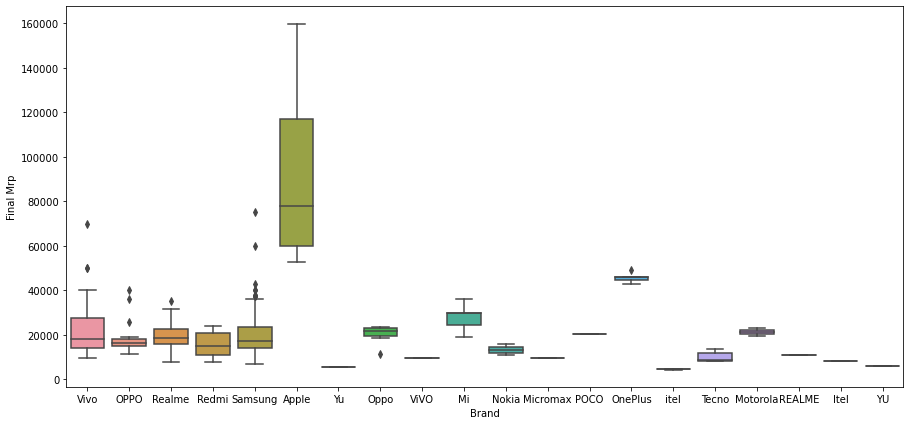

In [29]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df['Brand'], y = df['Final Mrp'])

**Observation** - The above plot show us the most expensive mobile phone. We can see that APPLE is havng highest cost of all the mobile phones listing on Paytm Mall website.And also Samsung,One plus,Redmi are having costly mobile phones

<AxesSubplot:xlabel='Final Mrp', ylabel='Density'>

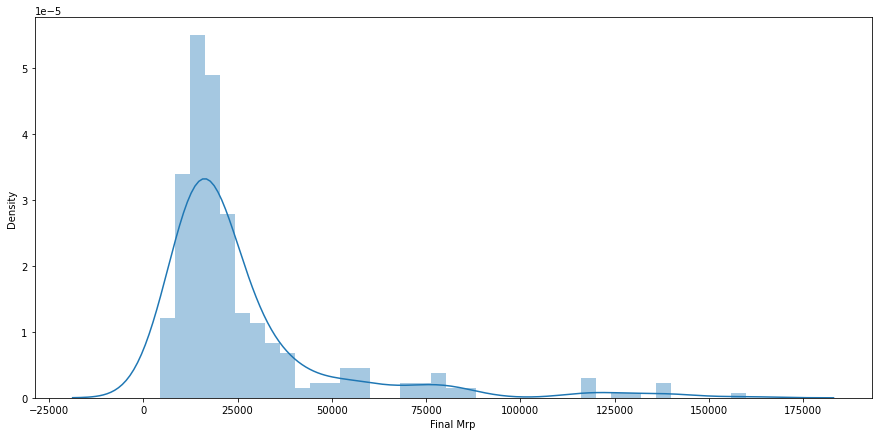

In [30]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Final Mrp'])

**Observation** - From the above plot we can see that more no of mobile phones can come under the range of 20000(Twenty thousand rupees).And ther are some outliers which can cost more than 140000(One lakh forty thousand rupees)

<AxesSubplot:xlabel='Brand', ylabel='count'>

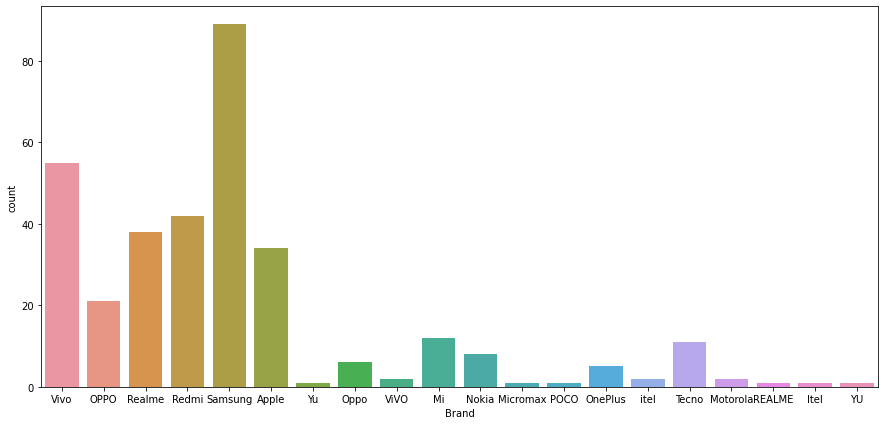

In [31]:
plt.figure(figsize=(15, 7))
sns.countplot(df['Brand'])

 **Observation** - The above plot shows us that Samsung and Redmi are present more in number.When compared to other brand mobile phones in Paytm Mall website.

<AxesSubplot:xlabel='Total Price', ylabel='Discount %'>

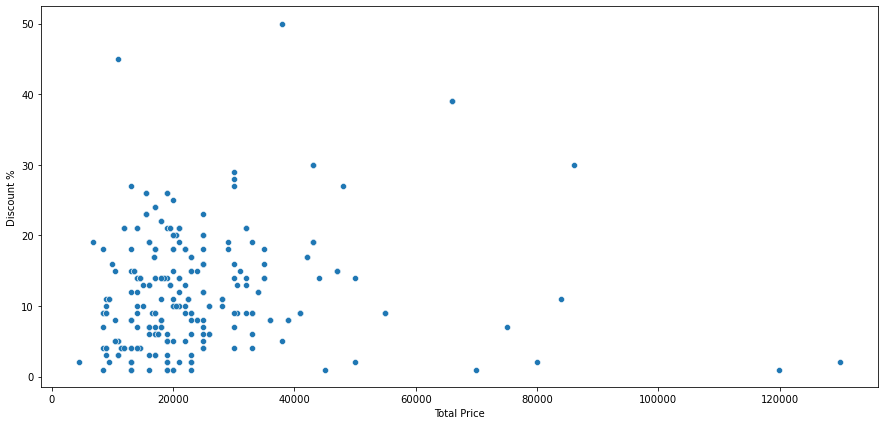

In [32]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['Total Price'], y = df['Discount %'])

**Observation** - From the above plot we can see that mobile phones under 20,000 range are having more discounts.where as moderate discuonts are in between 20,000-40,000.

In [33]:
df.groupby(['Brand']).agg({'Final Mrp' : ['min', 'max', 'mean']})

Final Mrp                        
               min       max          mean
Brand                                     
Apple      52500.0  159900.0  86867.882353
Itel        8409.0    8409.0   8409.000000
Mi         18999.0   35999.0  28079.166667
Micromax    9699.0    9699.0   9699.000000
Motorola   19299.0   22999.0  21149.000000
Nokia      10999.0   15950.0  13230.750000
OPPO       11490.0   39980.0  18142.571429
OnePlus    42999.0   48999.0  45699.000000
Oppo       11490.0   23490.0  20073.333333
POCO       20500.0   20500.0  20500.000000
REALME     10999.0   10999.0  10999.000000
Realme      7769.0   34990.0  19281.210526
Redmi       7749.0   23999.0  15442.142857
Samsung     6999.0   75000.0  20570.415730
Tecno       8176.0   13499.0  10324.000000
ViVO        9490.0    9490.0   9490.000000
Vivo        9490.0   69990.0  21762.272727
YU          5999.0    5999.0   5999.000000
Yu          5499.0    5499.0   5499.000000
itel        4399.0    4499.0   4449.000000

<AxesSubplot:xlabel='Brand'>

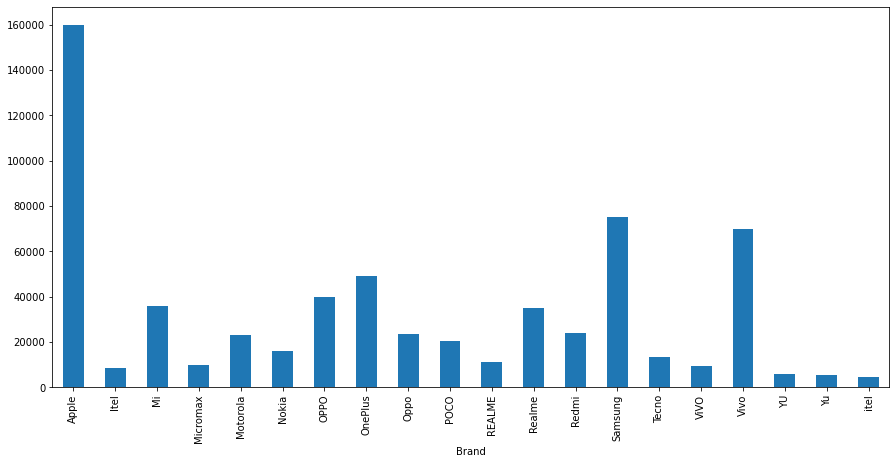

In [34]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['Final Mrp'].max().plot(kind = 'bar')

**Observation** - The above plot shows the maximum price range of all brand mobiles available in the Paytm Mall website.

<AxesSubplot:xlabel='Brand'>

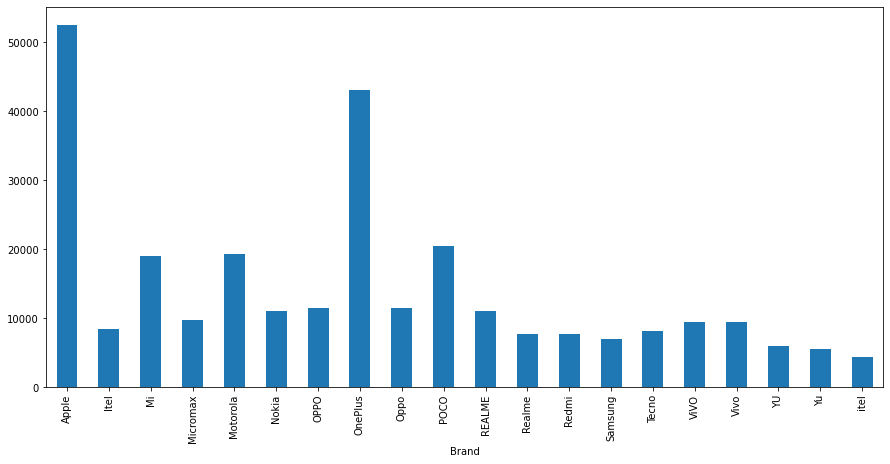

In [35]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['Final Mrp'].min().plot(kind = 'bar')

**Observation** - The above plot shows the minimum price range of mobiles on each brands available in paytm Mall website

In [36]:
df.corr()

,Final Mrp,Savings Amount,Total Price,Discount %
Final Mrp,1.000000,NaN,0.980906,-0.062081
Savings Amount,NaN,NaN,NaN,NaN
Total Price,0.980906,NaN,1.000000,0.107617
Discount %,-0.062081,NaN,0.107617,1.000000


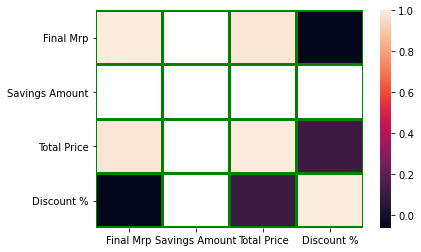

In [37]:
sns.heatmap(df.corr(),linecolor='green',linewidths=2);

**Observation** - From the above graph we can understand the correlation among Final Mrp, Savings Amount, Total Price, Discount %

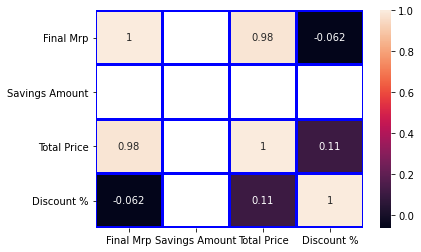

In [38]:
sns.heatmap(df.corr(),linecolor='blue',linewidths=2,annot=True);

**Observation** - The above graph shows the data value of each cell

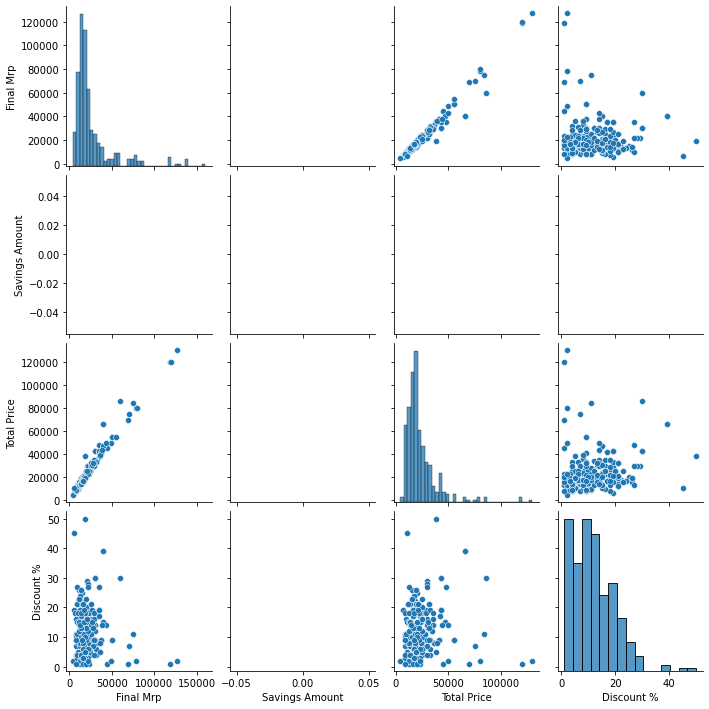

In [39]:
sns.pairplot(df);

**Observation** - The above pairplot gives the clear details about Total price, Savings Amount, Discount % and Final Mrp
and from here we can know the ranges clearly.

## Conclusion

- From the above details taken from Paytm Mall website we can say that all the features of the obile phones.and we can determine the price ranges of all the mobile phones
- We can also extract the how many no of mobile phone selling Brands
- We can also see the discounts given by paytm on different mobiles
- By using above data we can select a good mobile within our price range from Paytm Mall website